# Feature Scaling

## 1. Huấn luyện mô hình Regression thông thường

### Tạo dummy data

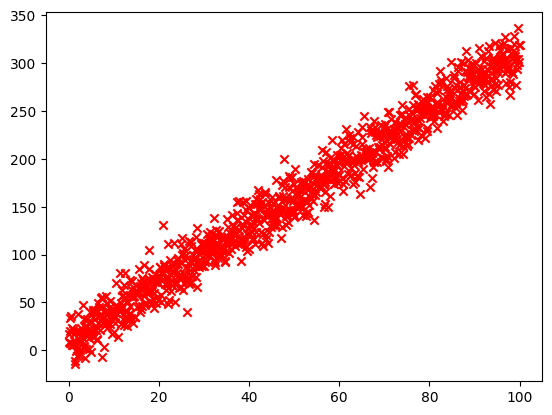

In [20]:
# Dữ liệu cho univariate linear regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Thiết lập seed để đảm bảo kết quả có thể tái tạo
np.random.seed(42)

# Tạo 1000 điểm dữ liệu
n_samples = 1000

# Tạo biến độc lập x (giá trị từ 0 đến 100)
x = np.linspace(0, 100, n_samples)

# Tạo biến phụ thuộc y với mối quan hệ tuyến tính: y = 3x + 10 + nhiễu
slope = 3
intercept = 10
noise = np.random.normal(0, 15, n_samples)  # Nhiễu ngẫu nhiên với độ lệch chuẩn 15
y = slope * x + intercept + noise

plt.scatter(x, y, marker='x', c='r')
plt.show()

In [21]:
# Chia dữ liệu
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Tạo mô hình và huấn luyện

In [51]:
import time

def predict(x, weight, bias):
    """Tính giá trị dự đoán y = wx + b"""
    return weight * x + bias

def compute_gradients(x, y, weight, bias):
    """Tính gradient cho weight và bias"""
    predictions = predict(x, weight, bias)
    errors = predictions - y
    dw = np.mean(errors * x)  # Gradient cho weight
    db = np.mean(errors)      # Gradient cho bias
    return dw, db

def train_linear_regression(x, y, learning_rate=0.0001, epochs=30):
    """
    Huấn luyện mô hình hồi quy tuyến tính sử dụng gradient descent
    Args:
        x: numpy array, biến độc lập
        y: numpy array, biến phụ thuộc
        learning_rate: tốc độ học
        epochs: số vòng lặp huấn luyện
    Returns:
        weight, bias: tham số mô hình đã huấn luyện
    """
    # Khởi tạo tham số
    weight = 0.0
    bias = 0.0
    mses = []

    # Kiểm tra đầu vào
    if len(x) != len(y):
        raise ValueError("Kích thước của x và y phải bằng nhau")
    if len(x) == 0:
        raise ValueError("Dữ liệu đầu vào rỗng")

    # Huấn luyện mô hình
    for epoch in range(epochs):
        # Tính gradient
        dw, db = compute_gradients(x, y, weight, bias)

        # Cập nhật tham số
        weight -= learning_rate * dw
        bias -= learning_rate * db

        y_pred = predict(x_test, weight, bias)
        mse = mean_squared_error(y_test, y_pred)
        mses.append(mse)
    return weight, bias, mses

def train(x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test, learning_rate=0.0001, epochs=30):
    try:
        st = time.time()
        # Huấn luyện mô hình
        final_weight, final_bias, mses = train_linear_regression(x_train, y_train, learning_rate, epochs)
        #
        ed = time.time()
        print(f"Thời gian huấn luyện: {ed-st}")
        print(f"Weight cuối cùng: {final_weight:.4f}")
        print(f"Bias cuối cùng: {final_bias:.4f}")

        # Vẽ đồ thị cuối cùng
        plt.clf()
        plt.scatter(x_train, y_train, marker='x', c='red', label='Data')
        x_line = np.array([min(x_train), max(x_train)])
        y_line = predict(x_line, final_weight, final_bias)
        plt.plot(x_line, y_line, c='blue', label='Final Regression Line')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Kết quả cuối cùng')
        plt.legend()
        plt.show()
    except Exception as e:
        print(f"Lỗi trong quá trình huấn luyện: {str(e)}")

    y_pred = predict(x_test, final_weight, final_bias)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

Thời gian huấn luyện: 0.016362905502319336
Weight cuối cùng: 3.1513
Bias cuối cùng: 0.0549


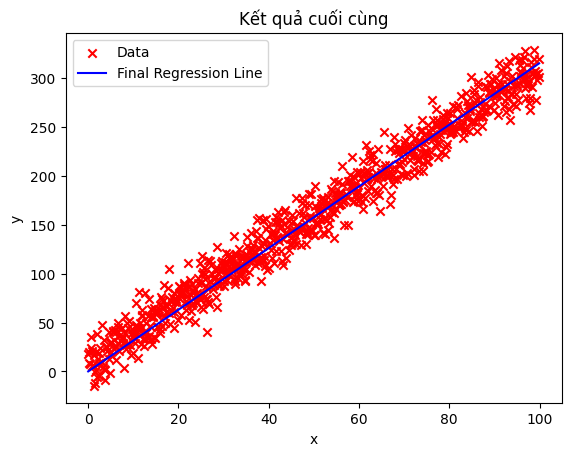

Mean Squared Error: 271.57022051236953


In [44]:
train()

## 2. Regression with Feature Scaling

Thời gian huấn luyện: 0.024461746215820312
Weight cuối cùng: 277.2494
Bias cuối cùng: 159.4987


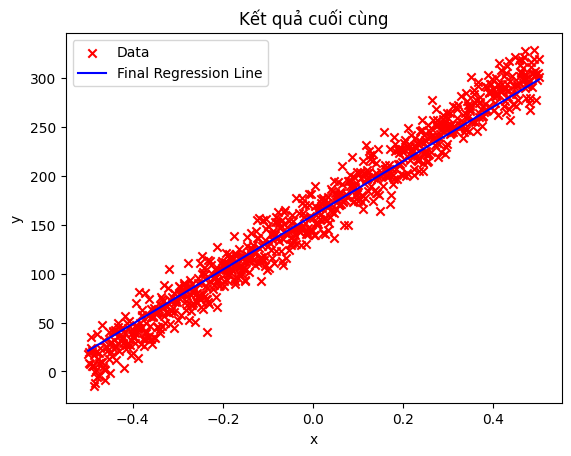

Mean Squared Error: 344.0946302717611


In [55]:
def Mean_normalization(x):
    max_x = np.max(x)
    min_x = np.min(x)
    mean_x = np.mean(x)
    return (x - mean_x) / (max_x - min_x)

x_train_scaled = Mean_normalization(x_train)
x_test_scaled = Mean_normalization(x_test)

train(x_train = x_train_scaled, x_test = x_test_scaled, learning_rate = 1, epochs = 30)

Thời gian huấn luyện: 0.023861169815063477
Weight cuối cùng: 292.0737
Bias cuối cùng: 14.1162


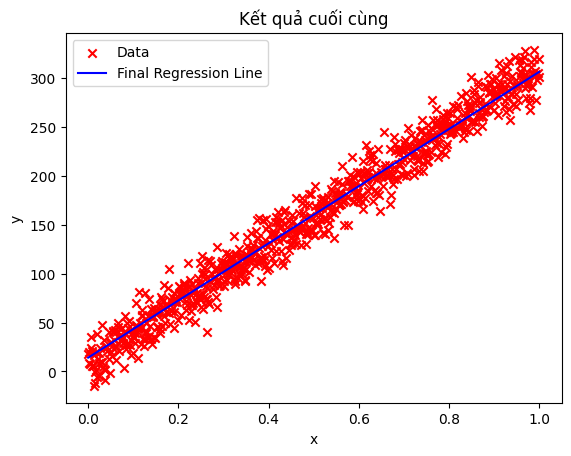

Mean Squared Error: 273.94330179084204


In [60]:
def Min_max_scaling(x):
    max_x = np.max(x)
    min_x = np.min(x)
    return (x - min_x) / (max_x - min_x)

x_train_scaled = Min_max_scaling(x_train)
x_test_scaled = Min_max_scaling(x_test)

train(x_train = x_train_scaled, x_test = x_test_scaled, learning_rate = 1, epochs = 50)

Thời gian huấn luyện: 0.01817607879638672
Weight cuối cùng: 86.0999
Bias cuối cùng: 159.4987


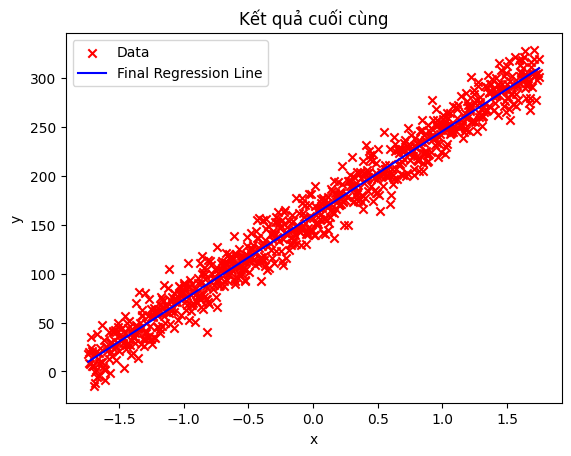

Mean Squared Error: 297.7695908945142


In [67]:
def z_score_scaling(x):
    mean_x = np.mean(x)
    std_x = np.std(x)
    return (x - mean_x) / std_x

x_train_scaled = z_score_scaling(x_train)
x_test_scaled = z_score_scaling(x_test)

train(x_train = x_train_scaled, x_test = x_test_scaled, learning_rate = 1, epochs = 30)

# 3. Nhận xét
Đối với dữ liêu đơn giản, việc chuẩn hóa không những không cải thiện độ chính xác mà còn làm chậm quá trình hội tụ